# Import Necessary Packages

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "6,7"

import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image 

from itertools import product # draw 10 * 10 images
from tqdm import tqdm

import matplotlib.pyplot as plt
# Enable Jupyter notebook plotting
%matplotlib inline

# Pytorch Version
print(torch.__version__)
print(torch.cuda.is_available())

1.7.0
True


# Hyper Parameters

In [2]:
batch_size = 128
num_epoch = 50

lr = 1e-3 # leanring rate of Encoder and Decoder

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Datasets files & utils

In [3]:
# the path we save data
if not os.path.exists('../img'):
    os.mkdir('../img')

# Transform of our datasets
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5), std = (0.5))
])
    
# MNIST datasets downloading……
mnist = datasets.MNIST(
    root = '../data/mnist/', train = True, transform = trans, download = True
)

# Dataloader
dataloader = torch.utils.data.DataLoader(
    dataset = mnist, batch_size = batch_size, shuffle = True
)

In [4]:
def to_gray_img(x):
    out = 0.5*(x+1)
    out = out.clamp(0,1) # force therandom distribution of x into [min, max]
    out = out.view(-1, 1, 28, 28) # view a multi-row Tensor as one row
    return out

# Model Definitions
## Encoder
Input of Encoder is an image, output is encoded
    vector representation of that image.

In [5]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.En = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 32),
        )
    
    def forward(self, x):
        x = self.En(x)
        return x

## Decoder
Input is an encoded vector representation, output is reconstructed image.

In [6]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.De = nn.Sequential(
            nn.Linear(32, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 784),
        )
    
    def forward(self, x):
        x = self.De(x)
        return x

## AutoEncoder
 Autoencoder super class to encode then decode an image

In [7]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # self.__dict__.update(locals())
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def forward(self, x):
        return self.decoder(self.encoder(x))

#  Traning Phase
## Model & Opitmizer

In [8]:
AE = Autoencoder()
AE = AE.to(device)

In [9]:

optimizer = torch.optim.Adam(params = [p for p in AE.parameters()
                                      if p.requires_grad],
                             lr = lr
                            )

## Trainning Start!

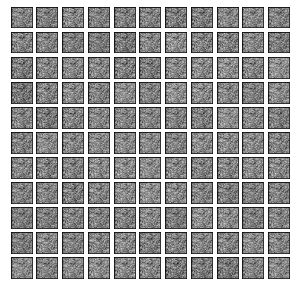

Epoch[0/50],recon_loss:7668.052246
Epoch[1/50],recon_loss:6455.436523
Epoch[2/50],recon_loss:5815.352539
Epoch[3/50],recon_loss:5556.682617
Epoch[4/50],recon_loss:5104.902344
Epoch[5/50],recon_loss:4926.826172
Epoch[6/50],recon_loss:5123.625977
Epoch[7/50],recon_loss:4684.747559
Epoch[8/50],recon_loss:4388.209473
Epoch[9/50],recon_loss:4417.050293


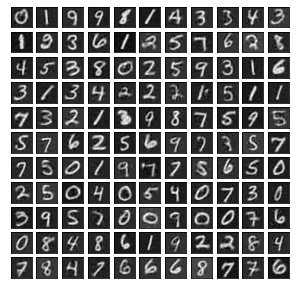

Epoch[10/50],recon_loss:4329.634766
Epoch[11/50],recon_loss:4480.028320
Epoch[12/50],recon_loss:3810.780273
Epoch[13/50],recon_loss:3966.493896
Epoch[14/50],recon_loss:3926.396484
Epoch[15/50],recon_loss:4010.853027
Epoch[16/50],recon_loss:4159.329590
Epoch[17/50],recon_loss:3916.138672
Epoch[18/50],recon_loss:3873.127441
Epoch[19/50],recon_loss:3750.488281


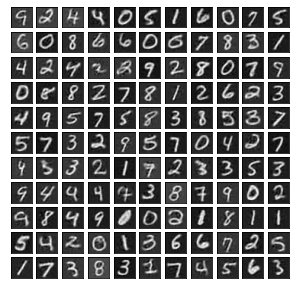

Epoch[20/50],recon_loss:3656.920898
Epoch[21/50],recon_loss:3926.947266
Epoch[22/50],recon_loss:3724.997070
Epoch[23/50],recon_loss:3759.107910
Epoch[24/50],recon_loss:3522.810547
Epoch[25/50],recon_loss:3524.790283
Epoch[26/50],recon_loss:3935.703125
Epoch[27/50],recon_loss:3496.028320
Epoch[28/50],recon_loss:3588.285156
Epoch[29/50],recon_loss:3787.466309


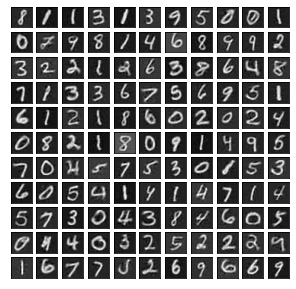

Epoch[30/50],recon_loss:3733.578125
Epoch[31/50],recon_loss:3365.664551
Epoch[32/50],recon_loss:3353.027832
Epoch[33/50],recon_loss:3366.261230
Epoch[34/50],recon_loss:3332.654541
Epoch[35/50],recon_loss:3195.080078
Epoch[36/50],recon_loss:3463.834961
Epoch[37/50],recon_loss:3448.015625
Epoch[38/50],recon_loss:3398.831299
Epoch[39/50],recon_loss:3287.194580


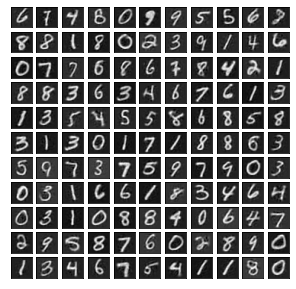

Epoch[40/50],recon_loss:3473.951660
Epoch[41/50],recon_loss:3237.833984
Epoch[42/50],recon_loss:3291.682129
Epoch[43/50],recon_loss:3147.705566
Epoch[44/50],recon_loss:3258.460938
Epoch[45/50],recon_loss:3385.045898
Epoch[46/50],recon_loss:3370.495117
Epoch[47/50],recon_loss:3261.324707
Epoch[48/50],recon_loss:3223.657715
Epoch[49/50],recon_loss:3109.714355


In [10]:
for epoch in tdqm(range(num_epoch)):
    AE.train()
    
    # epoch_loss = []
    # ========================= Reconstruct and Visualization ====================
    if epoch % 10 == 0:
        AE.eval()
        img,_ = next(iter(dataloader))
        num_img = img.size(0)
        img = img.view(num_img, -1)
        img = img.to(device)
        reconst_img = AE(img)
        plt.close()
        grid_size, k = int(reconst_img.shape[0] ** 0.5), 0 # 10 * 10
        fig, ax = plt.subplots(grid_size, grid_size, figsize=(5, 5))
        for i, j in product(range(grid_size), range(grid_size)): # to draw 10 * 10 images
            ax[i,j].get_xaxis().set_visible(False)
            ax[i,j].get_yaxis().set_visible(False)
            ax[i,j].imshow(reconst_img[k].data.view(28,28).cpu().numpy(), cmap='gray')
            k += 1
        plt.show()
    # ========================= Training==========================================
    for i, (img, _) in enumerate(dataloader): # Since we don't need any labels, we make label be '_'
        # =============================== IMAGES =================================
        num_img = img.size(0)
        img = img.view(num_img, -1)
        img = img.to(device)
        # =============================== Compute Loss ===========================
        output = AE(img)
        # l2 (mean squared error) loss.
        recon_loss = torch.sum((img - output) ** 2)
        
        optimizer.zero_grad() # before back propagation
        recon_loss.backward()
        optimizer.step()
        
        if (i+1)%250 == 0:
                print('Epoch[{}/{}],recon_loss:{:.6f}'.format(
                    epoch,num_epoch,recon_loss.item()))
